## Predict House Pricing Using Advanced Regression

In this project, we will develop a model that predicts house prices with the data we have. We will complete the gaps in our columns and make a few changes. We will train our model and see how well our model performs with the test data on Kaggle. This is a regression project. Our metrics are r2_score, mean squared error and root mean squared error.

### Things to know for success rate in regression
* 1 - R2_score >0.85
* 2 - Low RMSE(root mean squared error)
* 3 - Residuals should follow normal distribution

### Information about our columns
1. SalePrice:the property's sale price in dollars. This is the target variable that you are trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

<img src='house.png' width=550 >

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df1=pd.read_csv('train.csv')

In [3]:
df2=pd.read_csv('test.csv')
#Reading our file.

In [4]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df=pd.concat([df1,df2])
#We merge our files.

### EDA - Exploratory Data Analysis

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.shape

(2919, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [10]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
KitchenQual         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
YrSold              0
Fireplaces          0
MoSold              0
MiscVal             0
SaleCondition       0
TotRmsAbvGrd        0
PoolArea            0
3SsnPorch           0
ScreenPorch         0
EnclosedPorch       0
OpenPorchS

In [11]:
df.shape

(2919, 81)

In [12]:
#df.drop(['BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'OverallCond', 'MoSold',           
#'3SsnPorch','YrSold','LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2'],axis=1, inplace=True)
#We deleted those with correlations below 20 percent.

In [13]:
for none in ('MiscFeature','Fence','PoolQC','Alley','GarageType','GarageCond','GarageQual','FireplaceQu','GarageFinish'):
    df[none]=df[none].fillna('None')
#Instead of writing it long like below, we can write it like this.

In [14]:
for m in ('Electrical','KitchenQual','SaleType','Exterior1st','Exterior2nd','Functional','Utilities','MSZoning',
            'BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond','BsmtExposure','MasVnrType'):
    df[m]=df[m].fillna(df[m].mode()[0])
#Filling empty data with mode

In [15]:
for s in('BsmtFinSF1','BsmtUnfSF','GarageCars','GarageArea','TotalBsmtSF','BsmtFullBath',
         'MasVnrArea','GarageYrBlt','LotFrontage','BsmtFinSF2','BsmtHalfBath'):
    df[s]=df[s].fillna('0').astype('int')
#Fill empty data with zero.
#These were objects. We converted them to int.

In [16]:
df.isnull().sum()
#We do not have any empty data. The Saleprice column is our target column so it may have empty values.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1870.364166,1.766016,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,449.686321,0.762196,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [18]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,0.001435,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.017203,0.018170,-0.014790,-0.025538,-0.008678,-0.022252,-0.037816,-0.029046,-0.000318,0.010243,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,0.000434,-0.011249,-0.009851,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.229823,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,-0.072431,-0.125561,-0.219008,-0.248641,0.309309,0.026482,0.071677,0.010436,-0.001728,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,-0.105161,-0.046794,-0.103534,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,0.001435,-0.229823,1.000000,0.135246,0.132635,-0.036252,0.027906,0.070162,0.108969,0.069193,-0.004681,0.136565,0.205762,0.242302,-0.004662,0.019003,0.185659,0.021255,-0.032766,0.081663,-0.029819,0.108014,0.021445,0.197209,0.054045,0.015251,0.142732,0.186527,0.000537,0.085640,0.023613,0.003704,0.044891,0.109480,0.002787,0.018746,-0.014728,0.209624
LotArea,-0.040746,-0.201730,0.135246,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,0.084107,0.021590,0.254316,0.332460,0.031515,0.000554,0.284519,0.126671,0.025838,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,0.073762,0.180379,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.132635,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,-0.042605,0.275643,0.549763,0.479152,0.245596,-0.048393,0.575126,0.165060,-0.040519,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.278322,0.600743,0.565179,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.036252,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,0.041359,-0.138687,-0.174837,-0.157418,0.005494,0.009048,-0.116569,-0.042823,0.083911,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,0.015334,-0.181926,-0.154312,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.027906,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,-0.027507,0.130786,0.408750,0.310814,0.017588,-0.144191,0.242666,0.211849,-0.030171,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.260010,0.538611,0.481328,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.070162,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152576,-0.061959,0.165770,0.299019,0.242245,0.158985,-0.060371,0.316972,0.135150,-0.046167,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.146811,0.425033,0.375892,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.026737,0.006309,0.108969,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301537,-0.014580,0.088173,0.393715,0.392367,0.119377,-0.057380,0.400088,0.141141,0.016204,0.254085,0.187685,0.078213,-0.051118,0.277103,0.273129,0.128585,0.357845,0.371071,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654,0.472614
BsmtFinSF1,-0.017203,-0.064002,0.069193,0.194168,0.282150,-0.050823,0.279780,0.152576,0.301537,1.000000,-0.054938,-0.476771,0.536650,0.458206,-0.161997,-0.065984,0.211980,0.639038,0.078500,0.081838,-0.007058,-0.113161,-0.086271,0.052629,0.293305,0.125422,0.255307,0.310219,0.223681,0.124366,-0.099575,

In [19]:
abs(df.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False)
#Correlation between columns

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

## Data Visualization

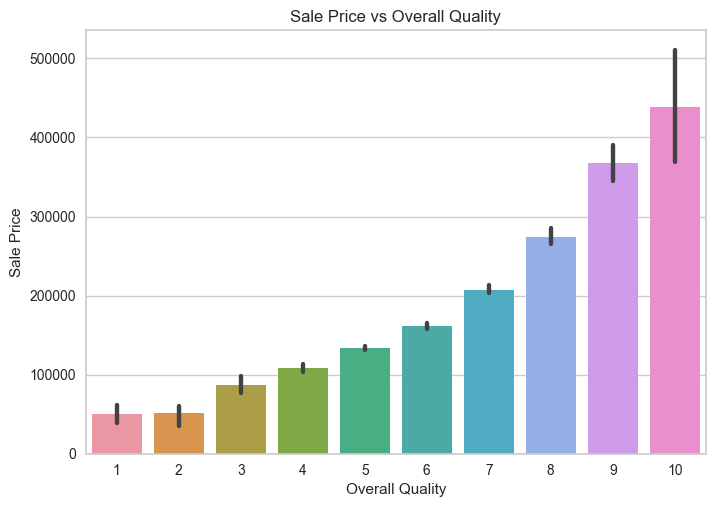

In [109]:
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price vs Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

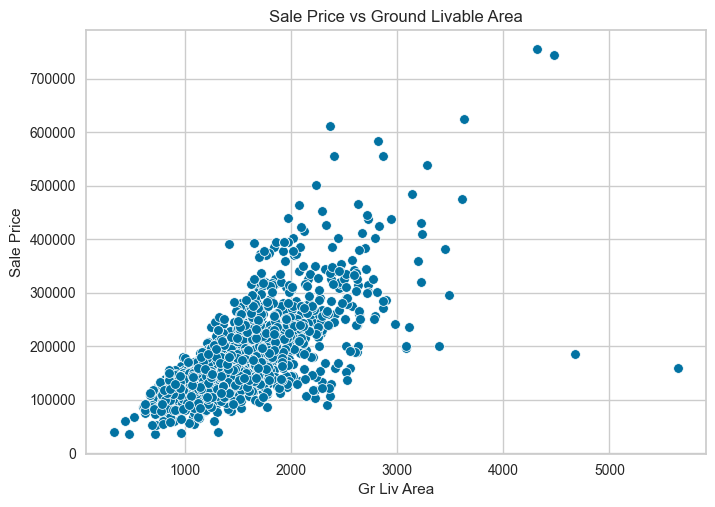

In [110]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs Ground Livable Area')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price');

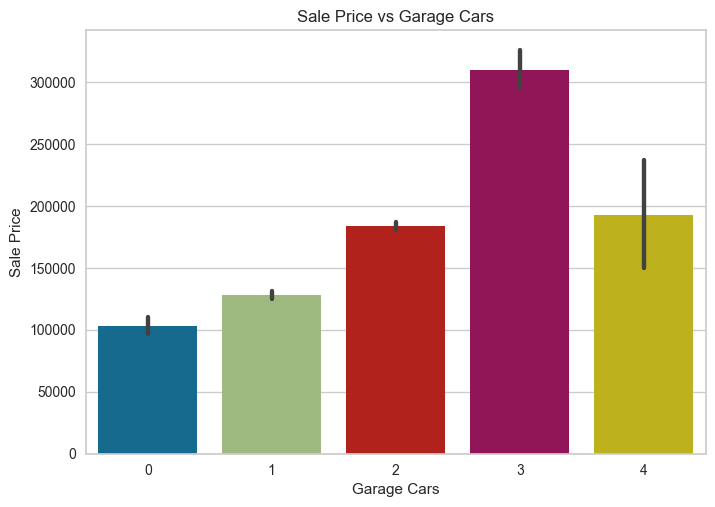

In [111]:
sns.barplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Sale Price vs Garage Cars')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price');

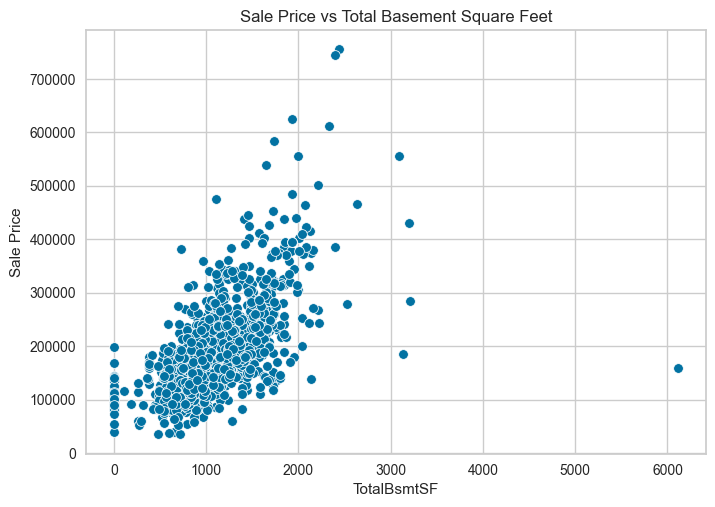

In [112]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('Sale Price vs Total Basement Square Feet')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price');

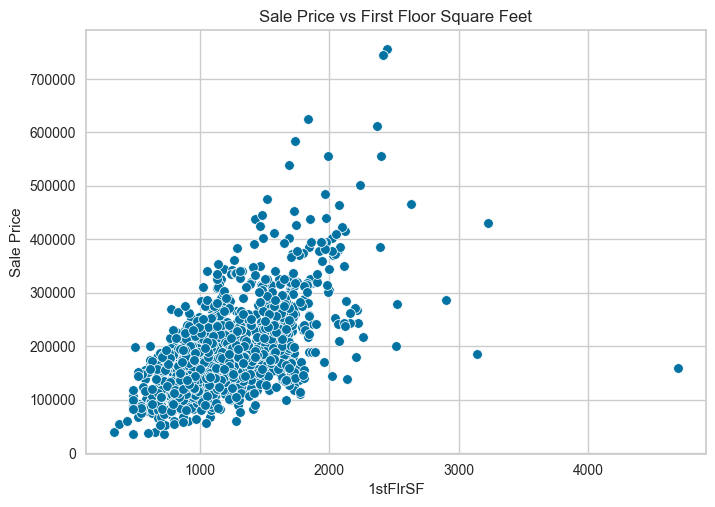

In [113]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df)
plt.title('Sale Price vs First Floor Square Feet')
plt.xlabel('1stFlrSF')
plt.ylabel('Sale Price');

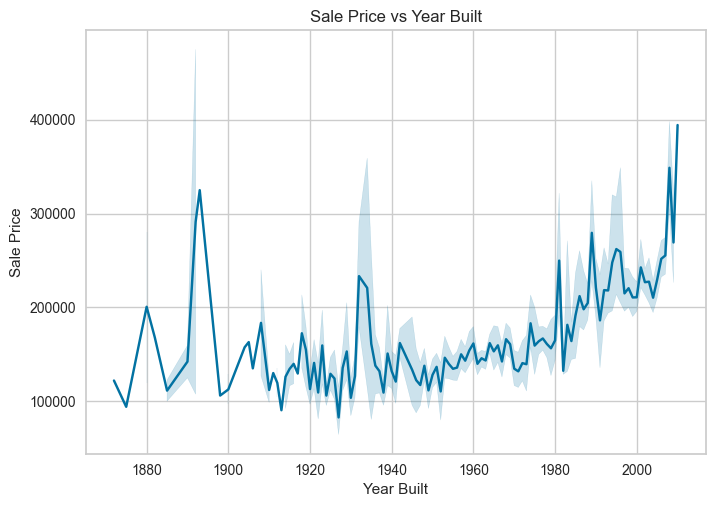

In [114]:
sns.lineplot(x='YearBuilt', y='SalePrice', data=df)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price');

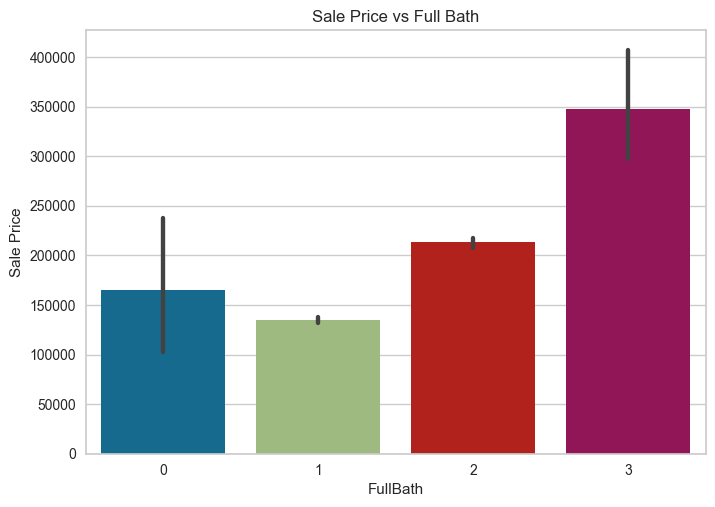

In [115]:
sns.barplot(x='FullBath', y='SalePrice', data=df)
plt.title('Sale Price vs Full Bath')
plt.xlabel('FullBath')
plt.ylabel('Sale Price');

### Outliers

In [27]:
#positive_outlier=df['SalePrice'].mean() + 3 * df['SalePrice'].std()
#negative_outlier=df['SalePrice'].mean() - 3 * df['SalePrice'].std()

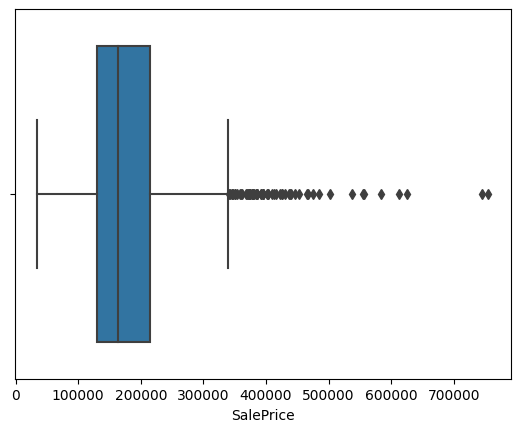

In [29]:
sns.boxplot(x=df['SalePrice']);

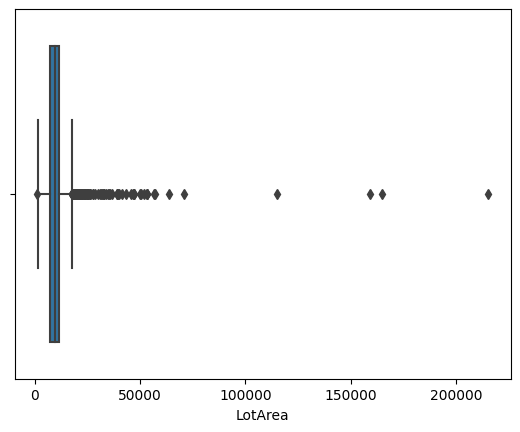

In [30]:
sns.boxplot(x=df['LotArea']);

In [31]:
#df=df[df['LotArea']<160000]

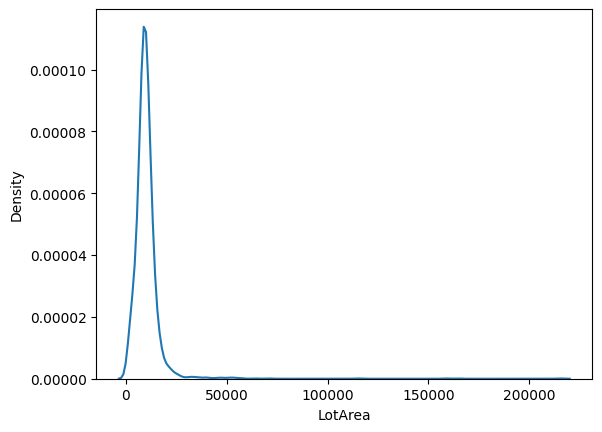

In [32]:
sns.kdeplot(x=df['LotArea']);

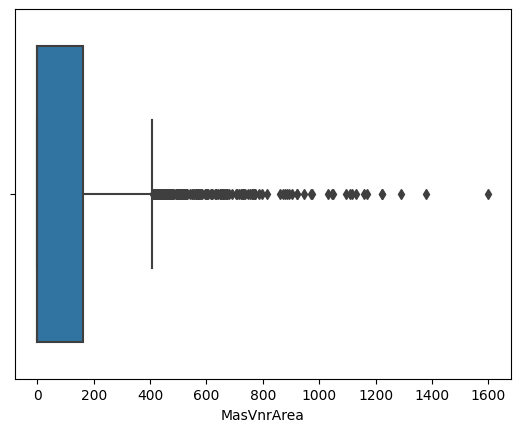

In [33]:
sns.boxplot(x=df['MasVnrArea']);

In [34]:
#df=df[df['TotalBsmtSF']<3000]

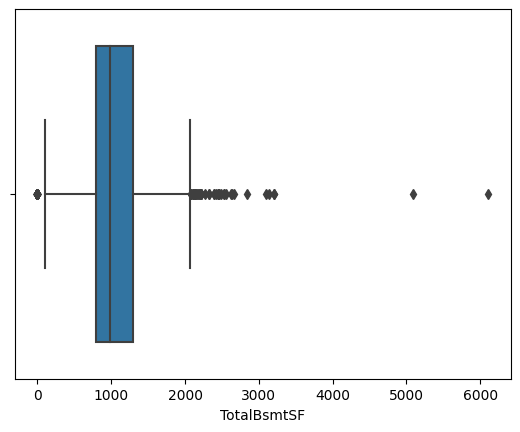

In [35]:
sns.boxplot(x=df['TotalBsmtSF']);

In [36]:
#df=df[df['1stFlrSF']<3000]

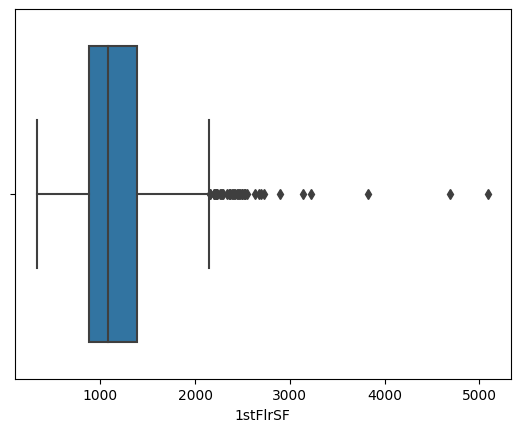

In [37]:
sns.boxplot(x=df['1stFlrSF']);

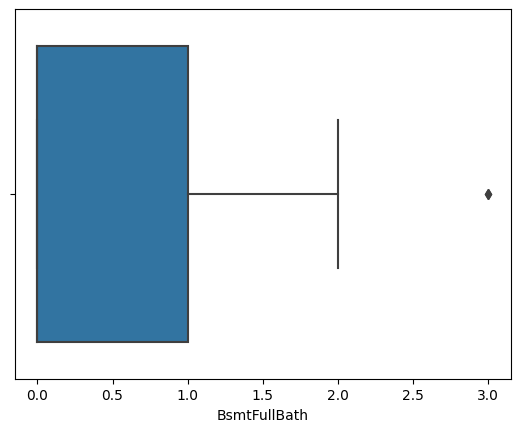

In [38]:
sns.boxplot(x=df['BsmtFullBath']);

In [39]:
#df=df[df['Fireplaces']<3]

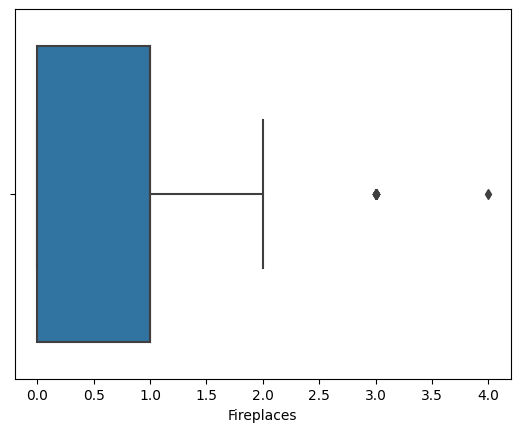

In [40]:
sns.boxplot(x=df['Fireplaces']);

In [41]:
#df=df[df['GarageCars']<4]

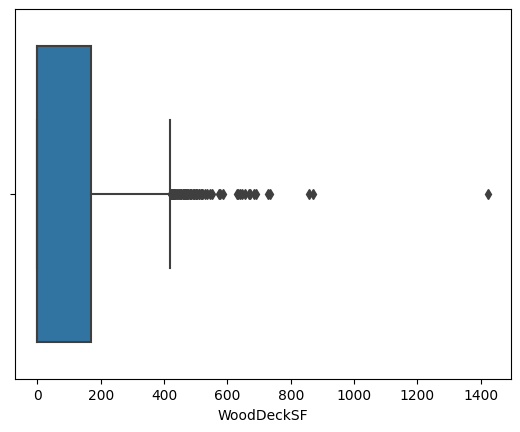

In [42]:
sns.boxplot(x=df['WoodDeckSF']);

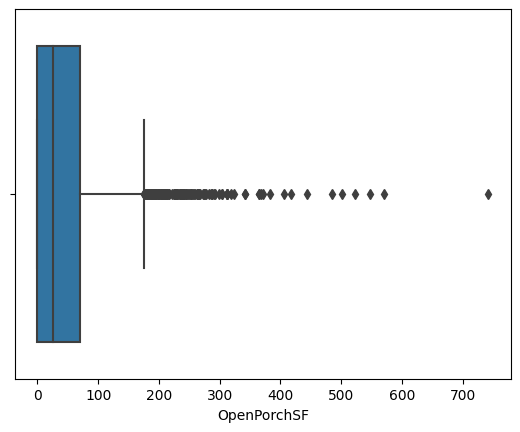

In [43]:
sns.boxplot(x=df['OpenPorchSF']);

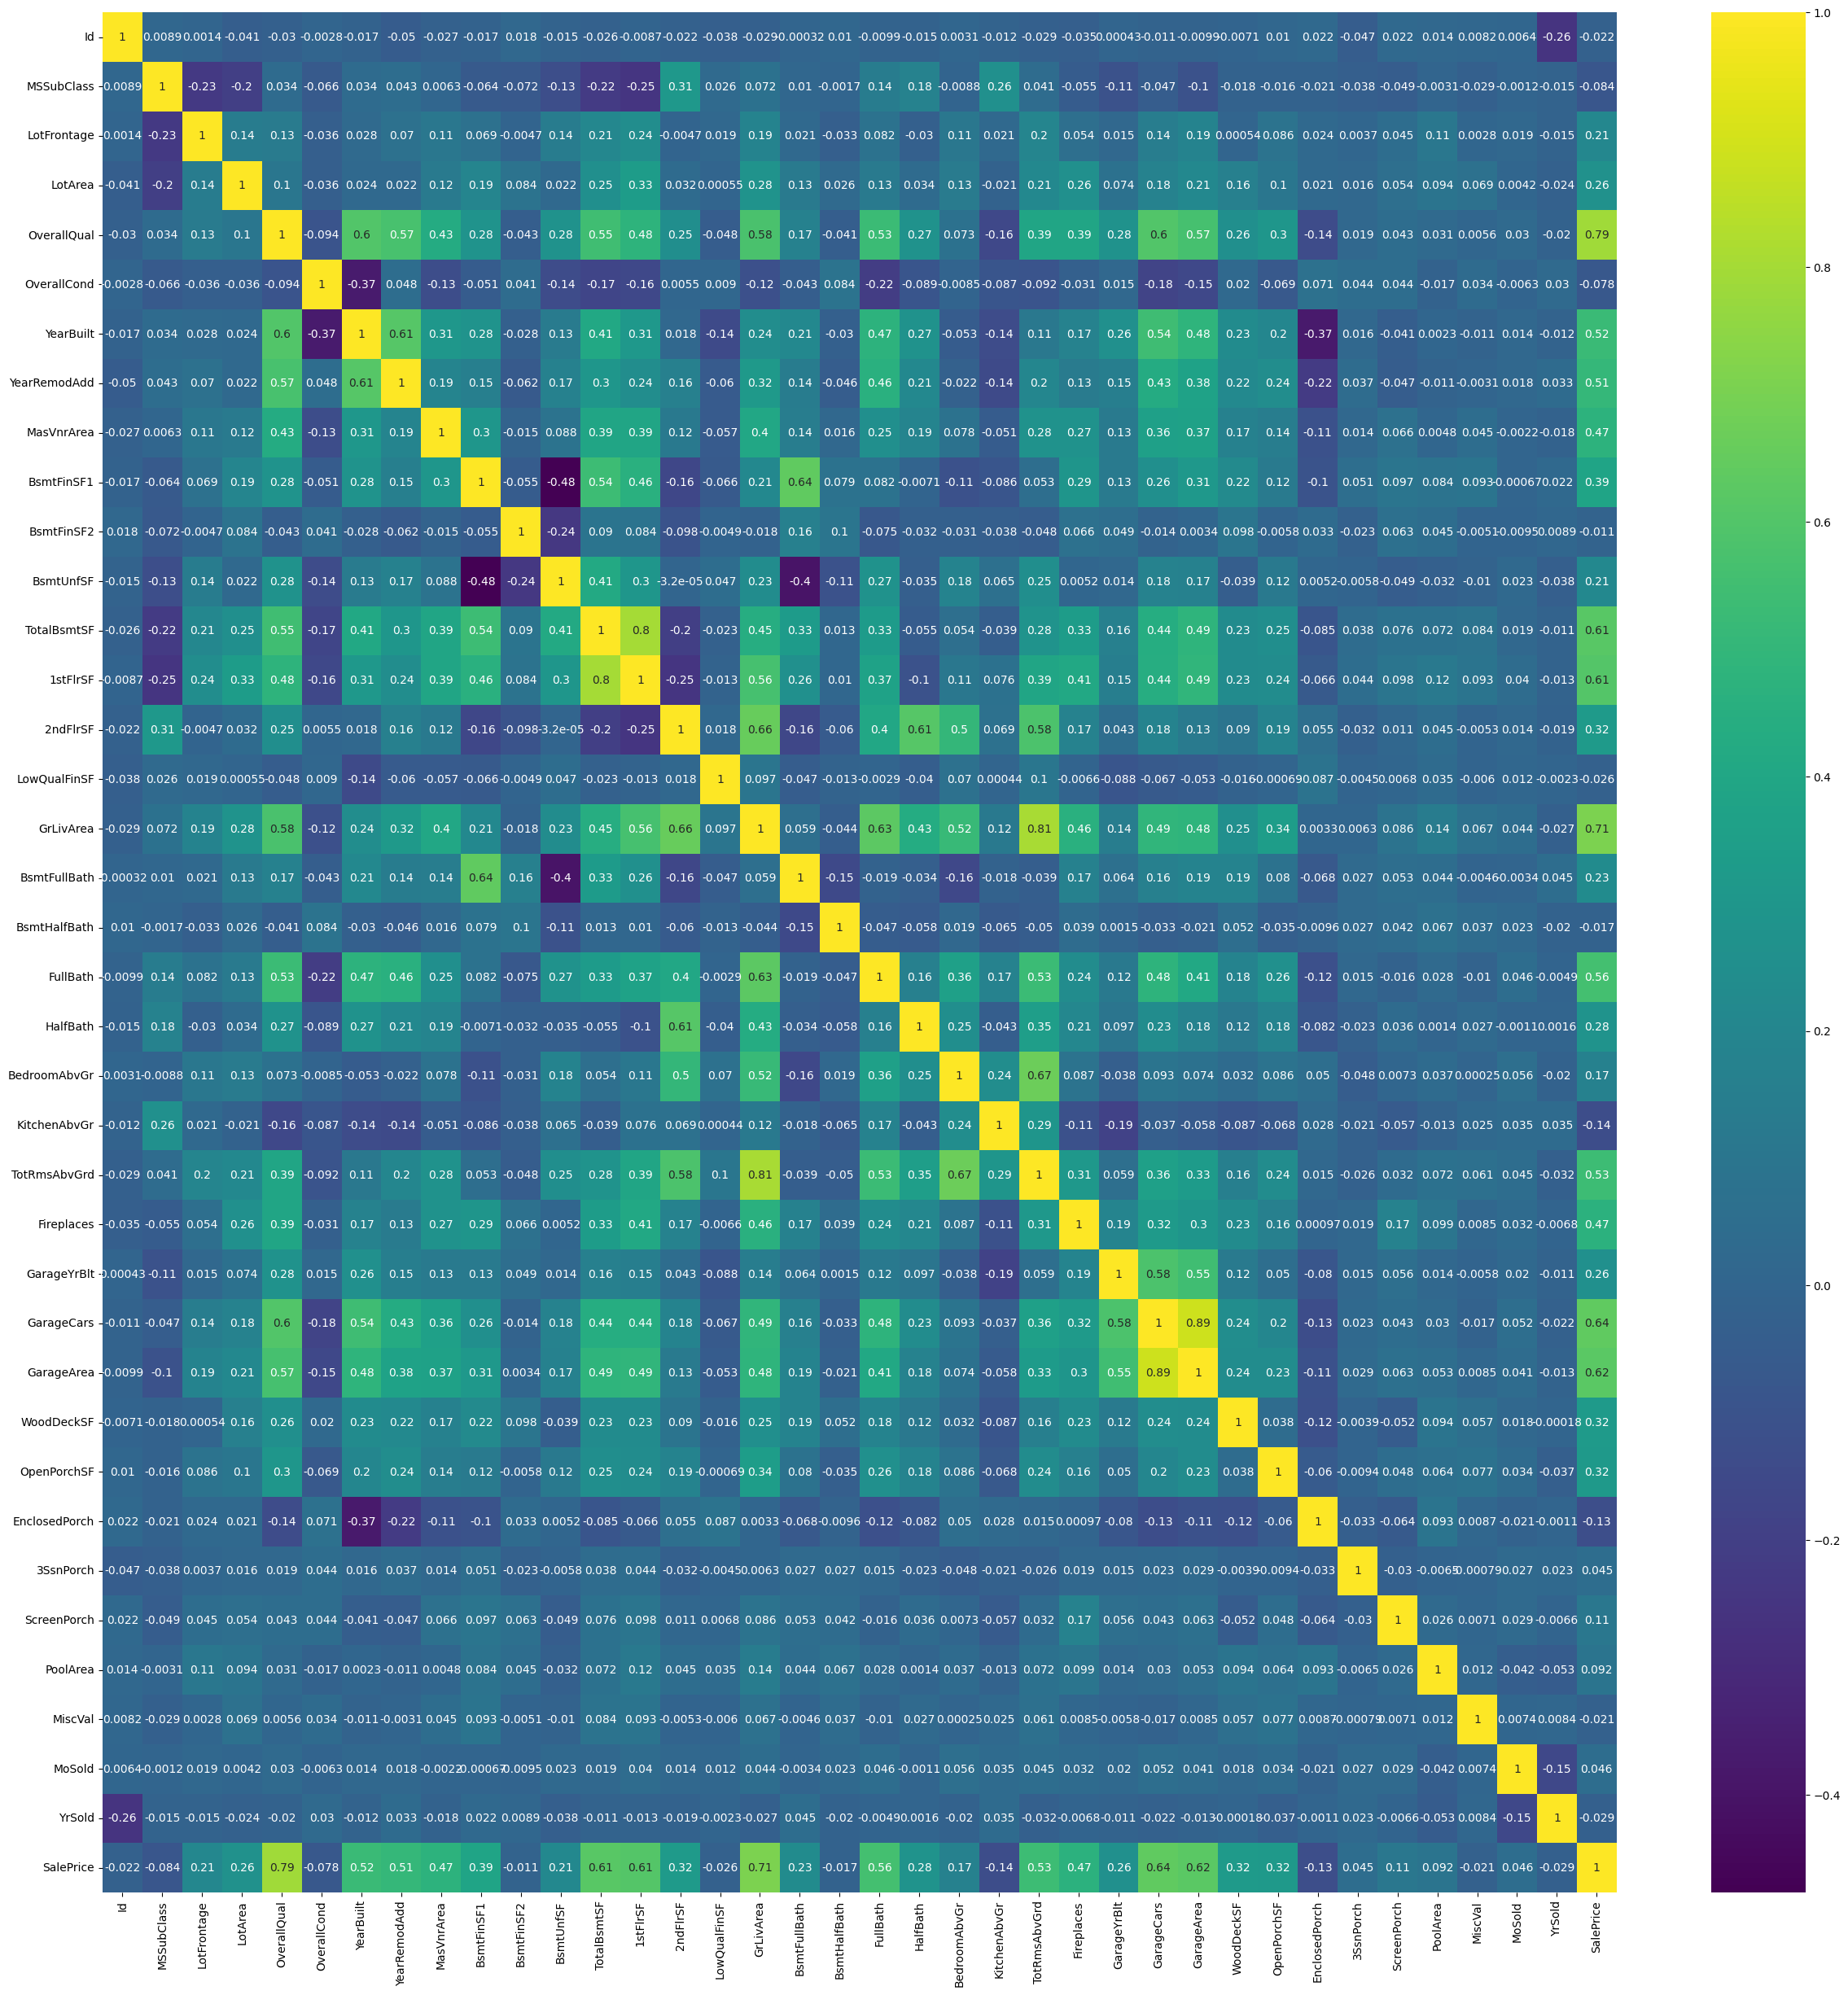

In [44]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='viridis');

In [45]:
df.to_csv('data.csv',index=False)

In [46]:
train=df[:1460]
test=df[1460:]
#We separate our data from the part we merged.

In [47]:
train.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60,7879,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,None,None,0,None,0,0,None,None,N,0,523,115,0,0,0,None,GdWo,None,0,11,2009,WD,Abnorml,34900.0
1159,1160,60,RL,76,9120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1974,1974,Hip,CompShg,HdBoard,HdBoard,BrkFace,270,Gd,TA,CBlock,TA,TA,No,ALQ,442,Unf,0,459,901,GasA,TA,Y,SBrkr,943,933,0,1876,0,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1974,RFn,2,540,Gd,TA,Y,0,69,0,0,0,0,None,None,None,0,7,2008,WD,Normal,185000.0


In [48]:
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
145,1606,80,RL,74,9620,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,7,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,0,TA,TA,CBlock,TA,TA,No,ALQ,679,Unf,0,564,1243,GasA,TA,Y,SBrkr,1285,0,0,1285,0,1,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1977,Unf,2,473,TA,TA,Y,375,26,0,0,0,0,None,GdPrv,Shed,80,5,2010,WD,Normal,NaN
987,2448,70,RM,53,9863,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,6,1927,1950,Gambrel,CompShg,Wd Sdng,Wd Sdng,BrkFace,0,TA,TA,BrkTil,TA,TA,No,LwQ,196,Rec,210,322,728,GasA,TA,Y,SBrkr,914,728,0,1642,0,1,1,1,4,1,TA,9,Typ,1,Gd,Detchd,1927,Unf,1,374,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,3,2007,WD,Abnorml,NaN
376,1837,85,RM,86,5160,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,SFoyer,4,6,1923,1950,Hip,CompShg,MetalSd,MetalSd,BrkFace,0,TA,Gd,PConc,Gd,Fa,Av,BLQ,749,Rec,63,46,858,GasA,TA,Y,SBrkr,892,0,0,892,1,0,1,0,1,1,Gd,5,Min2,0,None,None,0,None,0,0,None,None,N,0,0,105,0,160,0,None,None,None,0,7,2009,COD,Abnorml,NaN
1147,2608,20,RL,61,33983,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1977,1994,Gable,CompShg,Plywood,Plywood,BrkFace,0,TA,Fa,PConc,TA,TA,Mn,ALQ,1112,Unf,0,48,1160,GasA,TA,Y,SBrkr,1676,0,0,1676,1,0,1,1,3,1,Gd,6,Mod,2,TA,Attchd,1977,RFn,2,672,TA,TA,P,690,90,0,0,0,0,None,GdPrv,None,0,5,2007,WD,Normal,NaN
1003,2464,70,RM,47,7755,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1918,1995,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1100,1100,GasA,Ex,Y,FuseA,1100,1164,0,2264,0,0,2,1,4,1,TA,8,Typ,0,None,Detchd,1950,Unf,1,408,TA,TA,Y,0,152,0,0,0,0,None,MnPrv,None,0,5,2007,WD,Normal,NaN


In [49]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Modelling

In [50]:
x=train.drop('SalePrice',axis=1)
y=train[['SalePrice']]

In [51]:
x=pd.get_dummies(x,drop_first=True)

In [52]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [54]:
g=GradientBoostingRegressor()
g.fit(x_train, y_train)
pred=g.predict(x_test)

rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 28454.514395696588
R2 Score: 0.8944426393839352


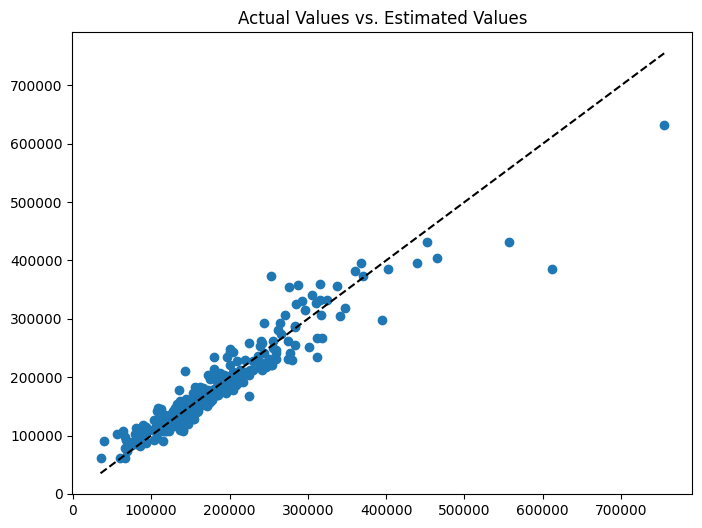

In [55]:
y_pred = g.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Actual Values vs. Estimated Values');
#for Gradient Boost Regressor

In [56]:
r=RandomForestRegressor()
r.fit(x_train, y_train)
pred1=r.predict(x_test)

rmse=mean_squared_error(y_test, pred1)**.5
r2=r2_score(y_test, pred1)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 29206.633027233824
R2 Score: 0.8887886395251071


In [57]:
lr=LinearRegression()
lr.fit(x_train, y_train)
pred3=lr.predict(x_test)

rmse=mean_squared_error(y_test, pred3)**.5
r2=r2_score(y_test, pred3)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 84564.59186105845
R2 Score: 0.06768369382690431


In [58]:
ri=Ridge()
ri.fit(x_train, y_train)
pred4=ri.predict(x_test)

rmse=mean_squared_error(y_test, pred3)**.5
r2=r2_score(y_test, pred4)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Root Mean Squared Error: 84564.59186105845
R2 Score: 0.8780008126378333


### Feature Importance

In [59]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':ri.coef_[0]})

In [60]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

In [61]:
feature_importance

,Feature,Coefs
118,RoofMatl_WdShngl,71481.621102
232,PoolQC_None,51346.749644
112,RoofMatl_CompShg,43698.982883
78,Neighborhood_StoneBr,43552.389688
139,Exterior2nd_ImStucc,35115.497727
71,Neighborhood_NoRidge,32669.978244
117,RoofMatl_WdShake,32464.177156
250,SaleCondition_Alloca,31327.694450
91,Condition2_PosA,28041.382875
72,Neighborhood_NridgHt,27454.017937


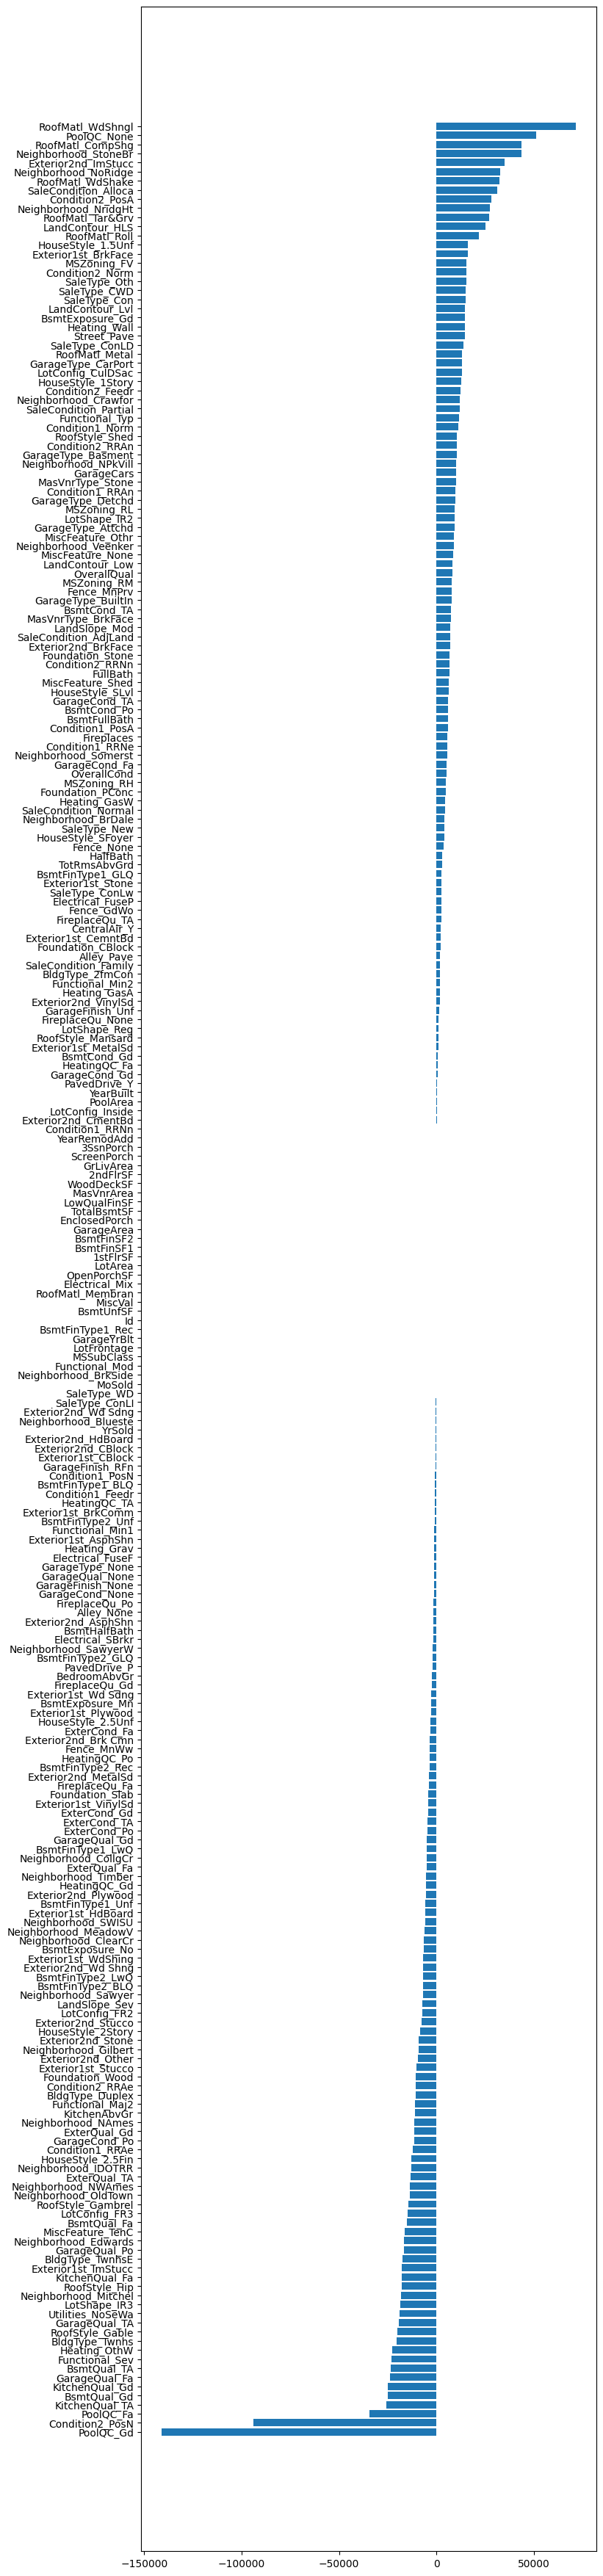

In [62]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,45))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [63]:
residuals=y_test-pred4

In [64]:
residuals

,SalePrice
892,-2659.123913
1105,-17032.240092
413,23337.303823
522,-23995.035582
1036,-16570.936348
614,7662.782724
218,59890.436308
1160,-616.257170
649,19340.754270
887,-12794.984719


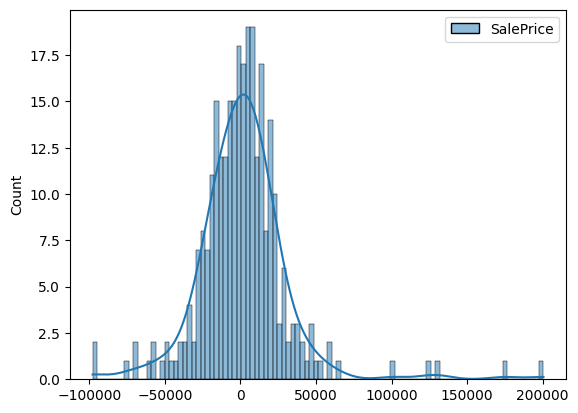

In [65]:
sns.histplot(residuals, kde=True,bins=100);

<Axes: xlabel='SalePrice', ylabel='Density'>

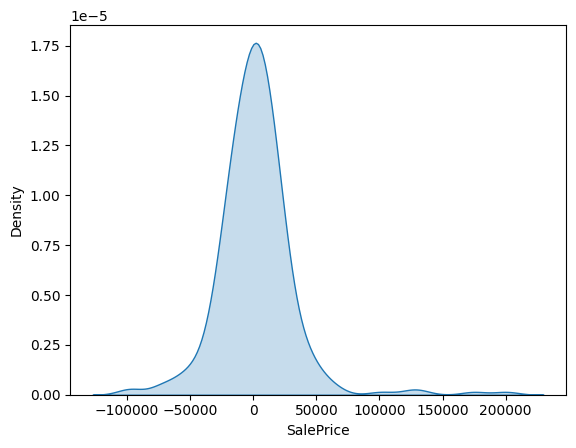

In [66]:
sns.kdeplot(x=residuals['SalePrice'], fill=True)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
 
        L=LinearRegression()
        RF=RandomForestRegressor()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,RF,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','RandomForest','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
      

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [68]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,9.010742e-01,2.754621e+04,1.690773e+04
Gradient Boosting,8.892416e-01,2.914710e+04,1.774366e+04
RandomForest,8.866804e-01,2.948217e+04,1.781872e+04
Ridge,8.780008e-01,3.059042e+04,1.964702e+04
KNeighborsRegressor,8.407171e-01,3.495357e+04,2.449894e+04
ElasticNet,8.392354e-01,3.511576e+04,2.010477e+04
Lasso,8.367563e-01,3.538548e+04,1.922384e+04
Extra Tree,8.004813e-01,3.911999e+04,2.684522e+04
Decision Tree,7.746310e-01,4.157708e+04,2.745431e+04
AdaBoost,6.874169e-01,4.896544e+04,2.972574e+04


### Test Data Training for Kaggle

In [69]:
## Gradient Boosting Regressor

In [70]:
df=pd.get_dummies(df,drop_first=True)

In [71]:
train=df[:1460]
test=df[1460:]

In [72]:
train['LogSalePrice']=np.log(train['SalePrice'])
#Kaggle wants the data we give for the test to be converted to logarithm. That's why we convert it to logarithm.

In [73]:
x_train=train.drop(['SalePrice', 'LogSalePrice'], axis=1)
y_train=train['LogSalePrice']

In [74]:
g=GradientBoostingRegressor()
g.fit(x_train, y_train)
x_test=test.drop('SalePrice', axis=1)

In [75]:
log_predictions=g.predict(x_test)

In [76]:
submission=pd.DataFrame()
submission['Id']=test['Id']  
submission['SalePrice']=np.exp(log_predictions)  

submission.to_csv('gbr.csv', index=False)

In [77]:
## Random Forest Regressor

In [78]:
train['LogSalePrice']=np.log(train['SalePrice'])

In [79]:
x_train=train.drop(['SalePrice', 'LogSalePrice'], axis=1)
y_train=train['LogSalePrice']

In [80]:
r=RandomForestRegressor()
r.fit(x_train, y_train)
x_test=test.drop('SalePrice', axis=1)

In [81]:
log_predictions=r.predict(x_test)

In [82]:
submission=pd.DataFrame()
submission['Id']=test['Id']  
submission['SalePrice']=np.exp(log_predictions)  

submission.to_csv('rfrlog.csv', index=False)

## AutoML with PyCaret

In [83]:
#pip install pycaret

In [84]:
from pycaret.regression import*

In [85]:
df = df.dropna(subset=['SalePrice'])

In [86]:
setup(data=df, target='SalePrice')

,Description,Value
0,Session id,4810
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 255)"
4,Transformed data shape,"(1460, 255)"
5,Transformed train set shape,"(1021, 255)"
6,Transformed test set shape,"(439, 255)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


In [87]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17338.8332,925595154.5800,28991.7740,0.8459,0.1399,0.0999,0.4890
gbr,Gradient Boosting Regressor,16847.5416,969571833.2722,29211.3624,0.8414,0.1378,0.0969,0.1630
xgboost,Extreme Gradient Boosting,18853.7127,1048710547.2000,30985.7113,0.8270,0.1482,0.1078,0.1540
rf,Random Forest Regressor,18407.6004,1081066694.8738,31053.2556,0.8217,0.1502,0.1079,0.4940
et,Extra Trees Regressor,18196.8385,1072771480.0765,31379.5783,0.8153,0.1524,0.1075,0.4490
ada,AdaBoost Regressor,23770.1825,1256498516.0649,34490.3184,0.7845,0.1957,0.1553,0.1270
ridge,Ridge Regression,19719.8325,1427756534.2997,35125.7831,0.7539,0.1743,0.1164,0.0300
en,Elastic Net,19908.9154,1553903201.2397,35810.1923,0.7444,0.1605,0.1139,0.0930
omp,Orthogonal Matching Pursuit,22215.1051,1639556558.9929,37481.3257,0.7265,0.2025,0.1330,0.0310
dt,Decision Tree Regressor,26928.2456,1678392028.4543,40449.1835,0.6976,0.2076,0.1558,0.0360


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Deep Learning

In [88]:
train=df[:1460]
test=df[1460:]

In [89]:
x=train.drop('SalePrice',axis=1)
y=train[['SalePrice']]

In [90]:
x=pd.get_dummies(x,drop_first=True)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42)

In [92]:
import tensorflow as tf

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
model=Sequential()
model.add(Dense(120,activation='relu'))  
model.add(Dense(80,activation='relu')) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [95]:
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [116]:
history=model.fit(x,y,epochs=2500, batch_size=250, validation_split=.20,verbose=0)

In [117]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │          30,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144,371 (563.95 KB)

 Trainable params: 48,123 (187.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 96,248 (375.97 KB)

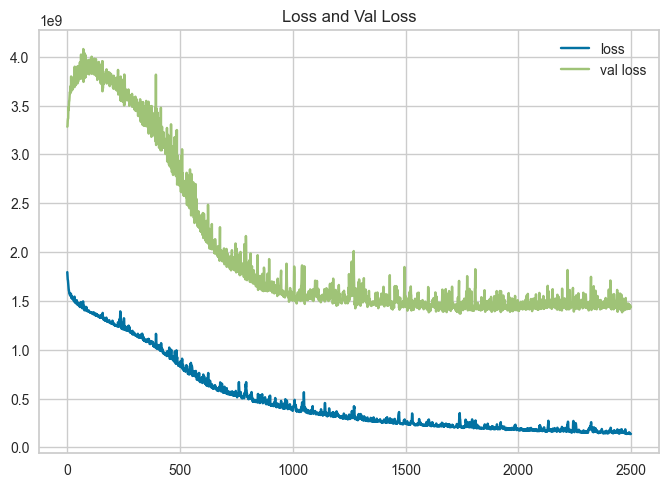

In [118]:
plt.plot(history.history['loss'],label='loss') 
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss and Val Loss')
plt.legend()

In [119]:
x_test = np.array(x_test, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

In [120]:
tahmin=model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [121]:
r2_score(y_test,tahmin)

0.9769178401512905

## Summary

The project was based on a dataset to predict house prices. This dataset included housing with different characteristics. Missing values in the dataset were detected and filled with appropriate strategies (filling with mean, median or mode). Outliers were analyzed and discarded if necessary. In accordance with Kaggle's evaluation criteria, the target variable SalePrice column was converted to logarithm. This allowed the model to perform better.
Our model was trained successfully. The best success of 90 percent was achieved with XGB Regressor. Then, pycaret and deep learning packages were used. Root Mean Squared Error (RMSE) and R² score were recorded for the selection of the model. These metrics show how close the model's predictions are to the real values.
The project was successfully completed using various machine developments and deep learning techniques to predict house prices.

My data gradient boost model that I gave for testing on Kaggle reached 0.13659 points, and my random forest model reached 0.14503.